In [41]:
import cv2
import time
import numpy as np
import matplotlib . pyplot as plt
from ex2_utils import generate_responses_1, get_patch, create_epanechnik_kernel

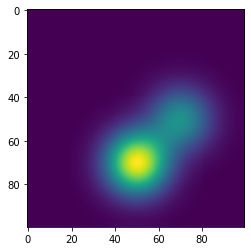

In [10]:
fig = plt.figure()
res = generate_responses_1()
plt.imshow(res)
plt.show()

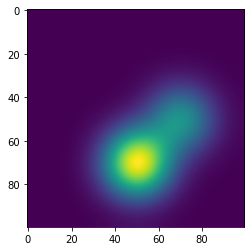

0.0016134696


In [25]:
ep = create_epanechnik_kernel(21,21, 1)

plt.imshow(cv2.filter2D(res, -1, ep))
plt.show()
print(np.max(res))

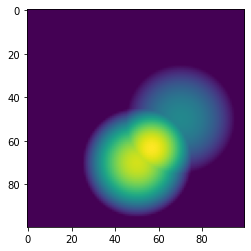

(100, 100)
1.0728


In [26]:
ep = create_epanechnik_kernel(51,51, 1)
responses = np.zeros((100, 100), dtype=np.float32)
responses[70, 50] = 1
responses[50, 70] = 0.5
filtered = cv2.filter2D(responses, -1, ep)

plt.imshow(filtered)
plt.show()
print(filtered.shape)
print(np.max(filtered))

In [81]:
# [X, Y] = np.meshgrid(range(11), range(11))
[X, Y] = np.meshgrid(np.arange(-5, 5 + 1), np.arange(-5, 5 + 1))
# Y = np.meshgrid(range(20), range(20))[0].T
wi,_ = get_patch(filtered, [40, 80], [20,20])
Y

array([[-5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5],
       [-4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4],
       [-3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3],
       [-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
       [ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
       [ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4],
       [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5]])

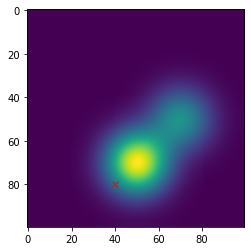

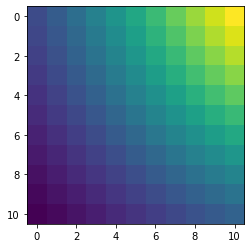

41.03487210860476 79.14706616243348


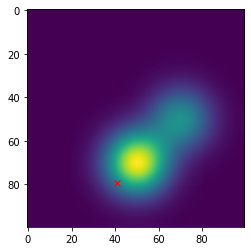

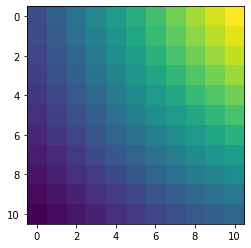

41.97961556701921 78.38620256935246


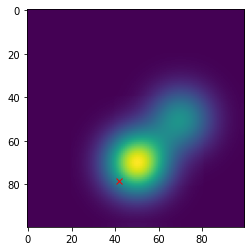

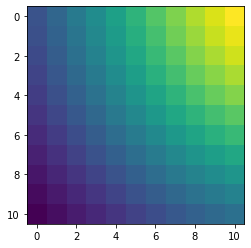

42.83334675221704 77.71812852821313


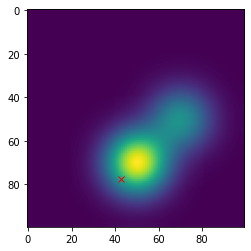

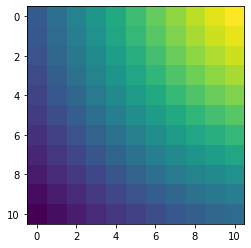

43.59496010700241 77.04976830095984


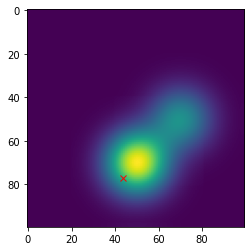

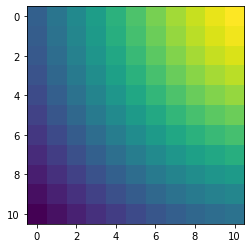

44.26406797301024 76.47467561648227


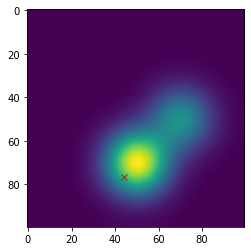

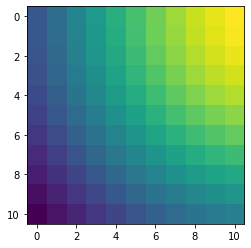

44.933663884177804 75.99378418107517


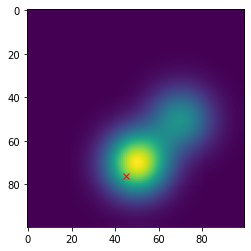

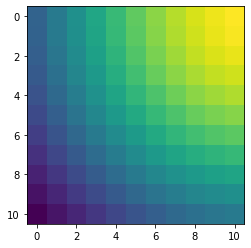

45.50979078235105 75.51235024328344


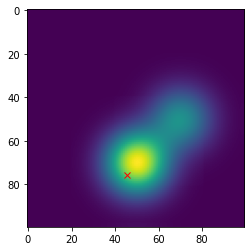

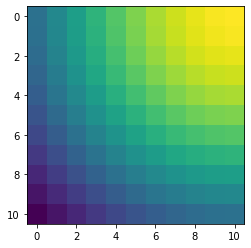

45.991875054780394 75.03026597085409


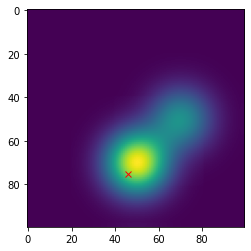

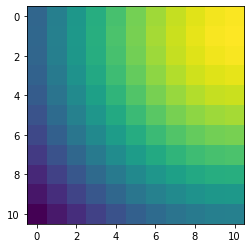

46.47467823699117 74.64245292847045


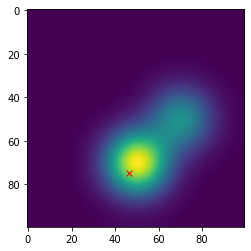

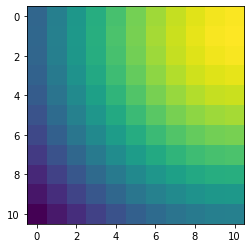

46.95748141920194 74.2546398860868


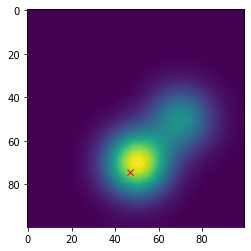

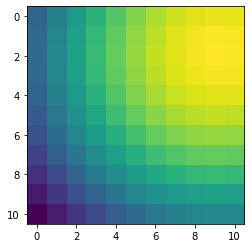

47.34721775818616 73.96029981947504


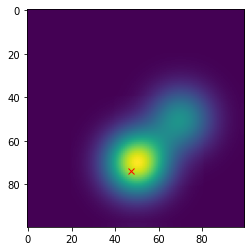

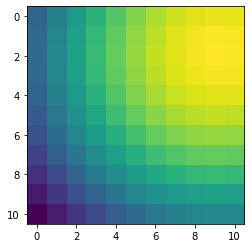

47.73695409717038 73.66595975286327


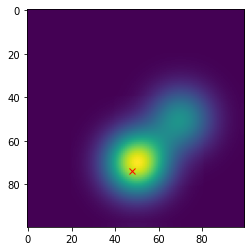

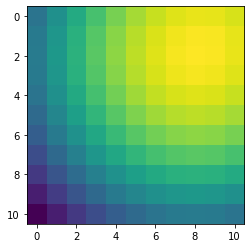

48.032568047288805 73.37034580274485


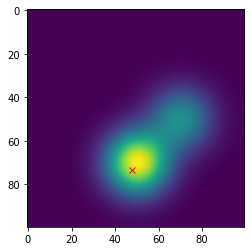

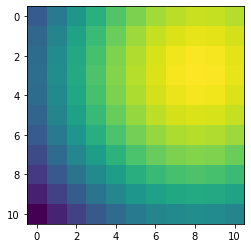

48.32970686769113 73.16889635869302


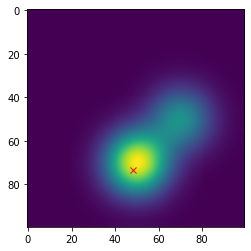

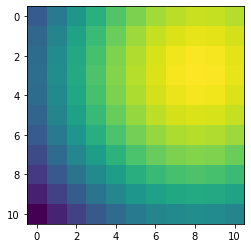

48.626845688093454 72.96744691464119


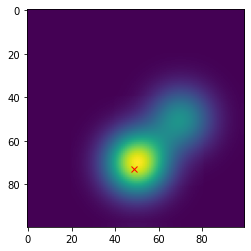

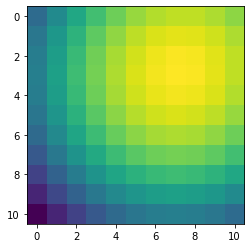

48.83014514343813 72.76414745929651


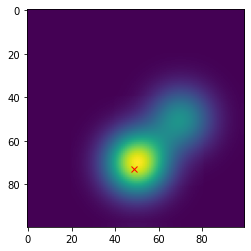

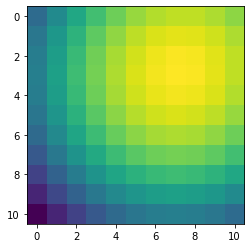

49.03344459878281 72.56084800395183


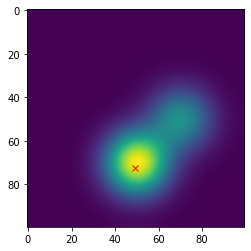

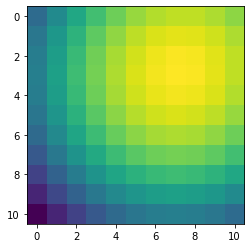

49.236744054127485 72.35754854860716


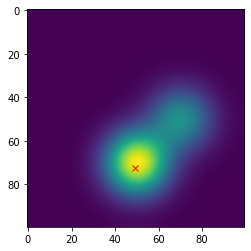

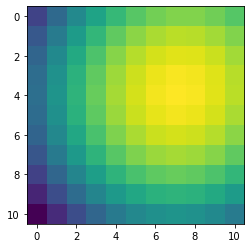

49.44225610885769 72.24790227063932


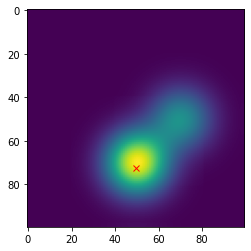

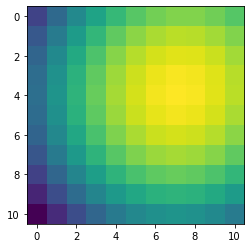

49.6477681635879 72.13825599267147


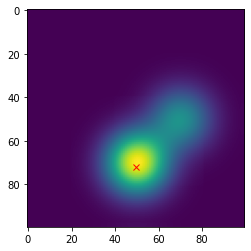

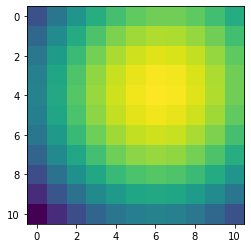

49.76009351061657 72.0259306456428


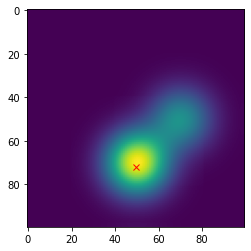

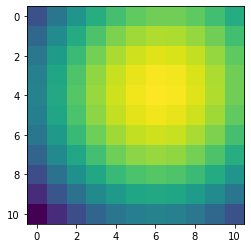

49.87241885764524 71.91360529861413


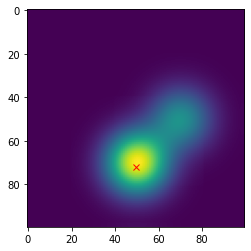

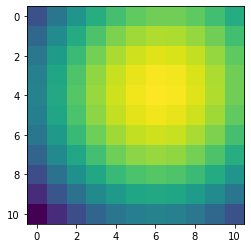

49.984744204673916 71.80127995158546


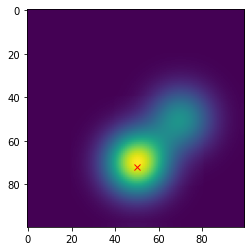

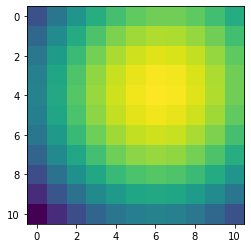

50.09706955170259 71.68895460455678


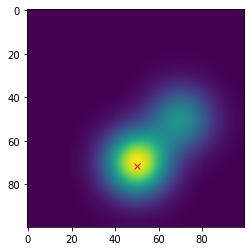

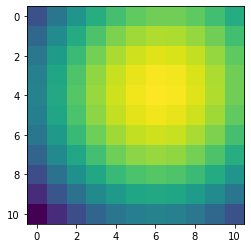

50.20939489873126 71.57662925752811


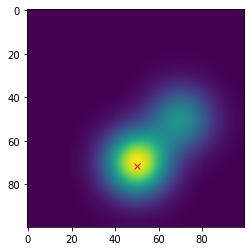

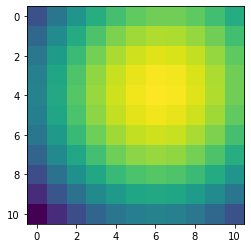

50.321720245759934 71.46430391049944


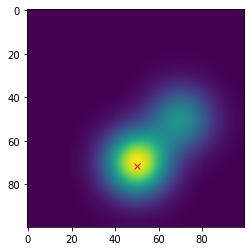

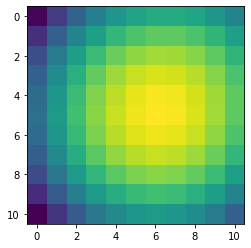

50.437246043700725 71.44470025110058


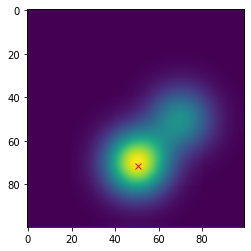

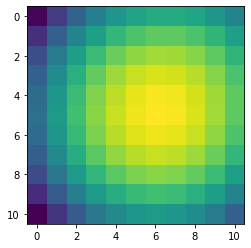

50.552771841641515 71.42509659170173


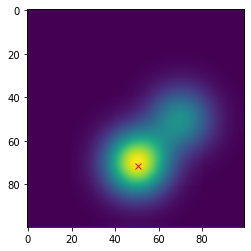

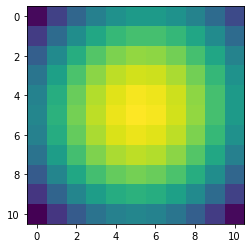

50.576241481117904 71.40162695222534


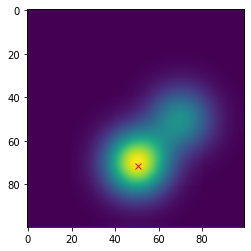

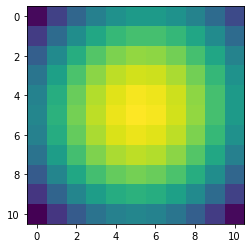

50.59971112059429 71.37815731274895


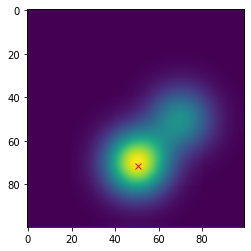

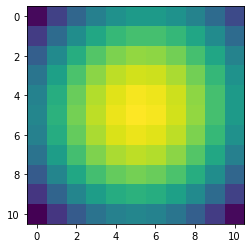

50.62318076007068 71.35468767327257


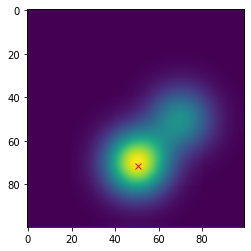

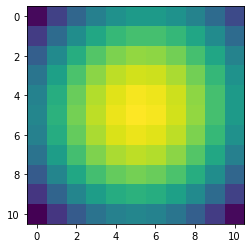

50.64665039954707 71.33121803379618


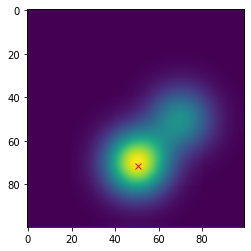

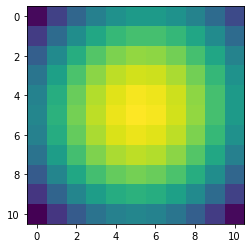

50.67012003902346 71.30774839431979


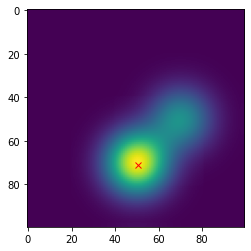

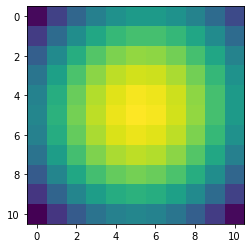

50.69358967849985 71.2842787548434


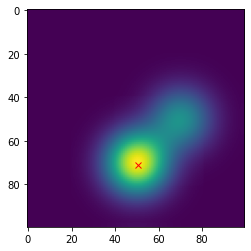

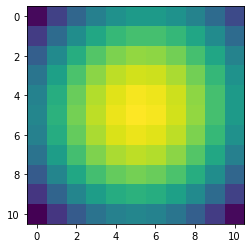

50.717059317976236 71.26080911536701


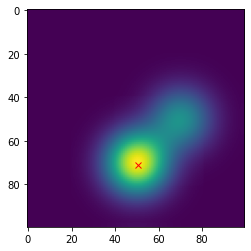

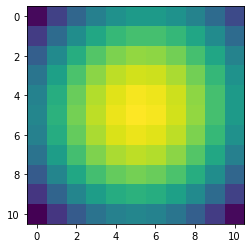

50.740528957452625 71.23733947589062


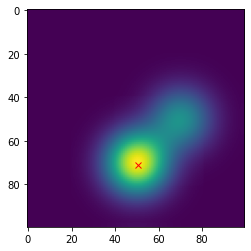

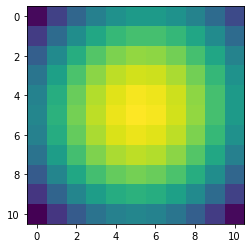

50.763998596929014 71.21386983641423


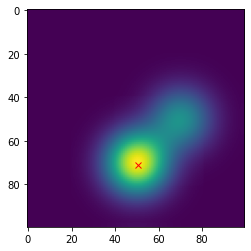

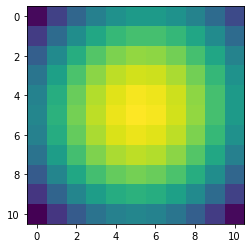

50.7874682364054 71.19040019693784


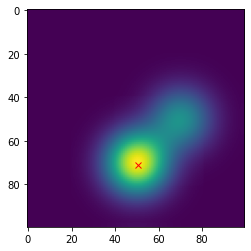

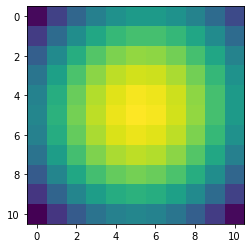

50.81093787588179 71.16693055746146


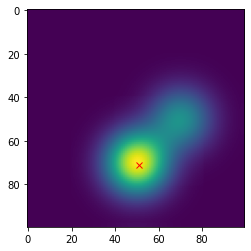

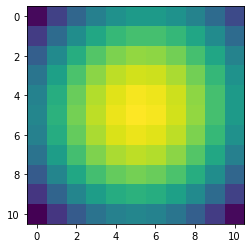

50.83440751535818 71.14346091798507


In [82]:
x, y = 40, 80
filtered = generate_responses_1()
for i in range(40):
    plt.imshow(filtered)
    plt.plot(x,y, 'rx')
    plt.show() 
    w,_ = get_patch(filtered, [x, y], [11,11])
    plt.imshow(w)
    plt.show() 
    w = w/np.sum(w)
    x = x + np.sum(np.multiply(w, X))
    y = y + np.sum(np.multiply(w, Y))
    print(x,y)